# We will be using one-hot encoding on the MNIST Dataset

## First lets review some theory
Tensors are N Dimensional arrays that store data with structure in mind. They help us structure data points for frames of video, photo or time series data.
We will use it for pictures of handwritten decimal characters.
(images,heightOfImageinPixels,widthOfImageinPixels,colorChannels)

Each convolution has local connections with the next one. If we are trying to detect an edge, we could set up a logical equation to represent each perceptron with their weight and value.
The way the perceptron connect to eachother has two factors, one factor is a stride which indicates the step of perceptrons to connect to, and filters which defines how many dimensions of connections happen.


In [6]:
import matplotlib.pyplot as plt
# Import Keras dataset "mnist"
from keras.datasets import mnist

In [7]:
# load it on variables
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [8]:
#lets look at our labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

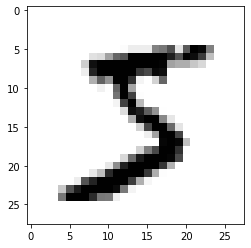

In [10]:
plt.imshow(x_train[0],cmap='gray_r')

In [11]:
# How do we tell our algorithm that the numbers in our label are actually categories instead of floating points dense values
from keras.utils.np_utils import to_categorical

In [12]:
# we turn it categorical this way
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [13]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
# It turned our category into a chain a binary values

In [15]:
single_image = x_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [16]:
# Lets normalize our values
single_image.max()

255

In [17]:
# We need it to be between 0 and 1

In [18]:
x_train = x_train / x_train.max()

In [19]:
x_test = x_test / x_test.max()

In [20]:
scaled_image = x_train[0]

In [21]:
scaled_image.max()

1.0

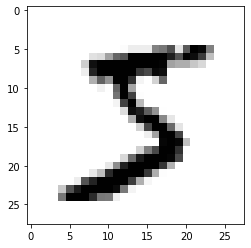

In [22]:
plt.imshow(scaled_image,cmap='gray_r')

In [24]:
# we can see our picture just fine.

# we need to reshape our data to be compatible with any image information.
x_train = x_train.reshape(60000,28,28,1)

In [25]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
x_test = x_test.reshape(10000,28,28,1)

In [28]:
x_test.shape

(10000, 28, 28, 1)

In [29]:
# in order to build out our model

from keras.models import Sequential

In [30]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [32]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))
# Now we flatten the 2 dimensional data to 1 dimensional
model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [34]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 54s 27ms/step - loss: 0.1366 - accuracy: 0.9585
Epoch 2/2
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0498 - accuracy: 0.9850


In [35]:
model.metrics_names


['loss', 'accuracy']

In [37]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.0412 - accuracy: 0.9871 3s - loss: 0.0614 - accuracy: 0.


[0.0411798395216465, 0.9871000051498413]

In [51]:
from sklearn.metrics import classification_report
import numpy as np
predictions = np.argmax(model.predict(x_test), axis=-1)

In [52]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

